# US Accidents Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("source\\US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(7728394, 46)

### Data Cleaning

In [4]:
df.replace('NA', np.nan)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Removing unwanted columns

Running this multiple times can give error 
If you want to execute copy the code and run

``` columns_to_drop = [
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
    'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
    'Astronomical_Twilight'
]

missing_columns = set(columns_to_drop) - set(df.columns)
print("Missing columns:", missing_columns)


In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(7728394, 46)

### 1. General Understanding of the Data

- Are there any missing values in the dataset? If yes, in which columns and how many?

In [9]:
missing_values = df.isnull().sum()


missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print(f"Missing values are present in the following columns:\n{missing_columns}")

Missing values are present in the following columns:
End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64


- What are the data types of each column? Are they appropriate, or do they need to be adjusted?

In [10]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [11]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [12]:
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [13]:
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [14]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

No other columns seems to be unappropriate regarding data type

- Are there any duplicate rows?

In [15]:
duplicate = df.duplicated()
duplicate

0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Length: 7728394, dtype: bool

### 2. Severity and Impact Analysis

- What is the distribution of Severity levels? Which level is the most frequent?

In [16]:
severity_distribution = df['Severity'].value_counts()
severity_distribution

2    6156981
3    1299337
4     204710
1      67366
Name: Severity, dtype: int64

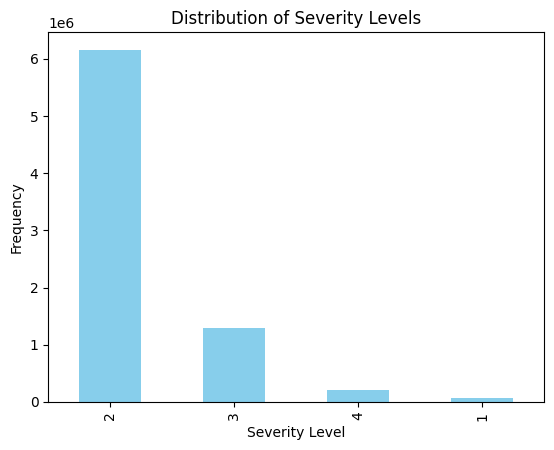

In [17]:
# Plot the distribution
severity_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.show()

- Is there a relationship between Severity and other columns like Weather_Condition, Time of Day, or Distance(mi)?

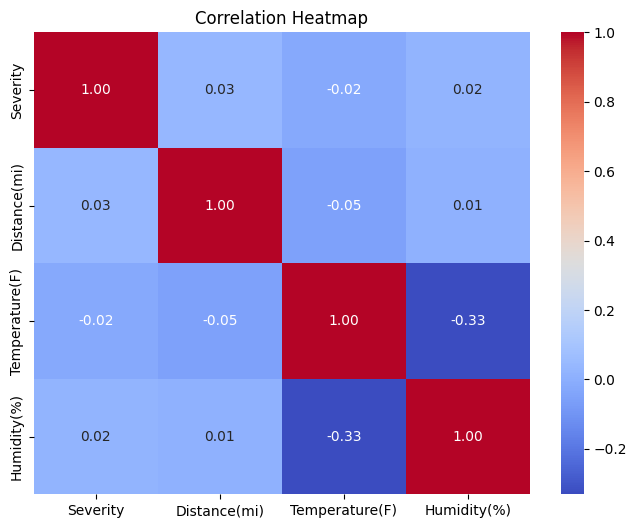

In [18]:
# Correlation heatmap
numerical_cols = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 3. Temporal Analysis

- During which time of day (Start_Time) do most incidents occur (morning, afternoon, evening, night)?

In [19]:
df['Hour'] = df['Start_Time'].dt.hour

In [20]:
def get_time_of_day(hour):
    if 5 <= hour <= 12:
        return "morning"
    elif 12 < hour <= 17:
        return "afternoon"
    elif 17 < hour <= 20:
        return "evening"
    else:
        return "night"
    
df['Time_of_Day'] = df['Hour'].map(get_time_of_day)

In [21]:
time_of_day_distribution = df['Time_of_Day'].value_counts()
time_of_day_distribution

morning      3214848
afternoon    2529130
night        1032027
evening       952389
Name: Time_of_Day, dtype: int64

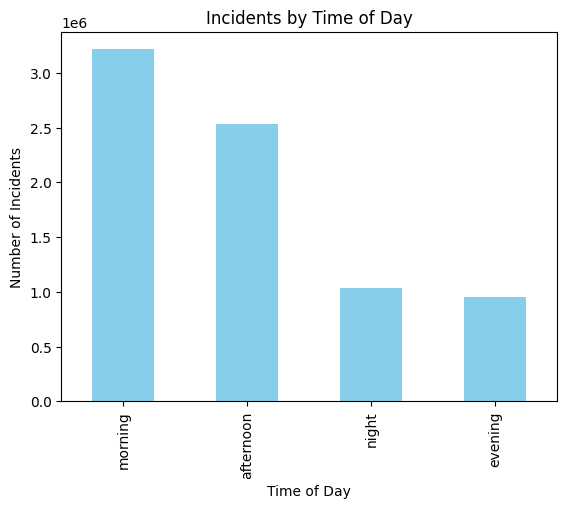

In [22]:
time_of_day_distribution.plot(kind='bar', color='skyblue')
plt.title('Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.show()

- Are there any specific days or months where incidents are more frequent?

In [23]:
df['Days'] = df['Start_Time'].dt.day
df['Months'] = df['Start_Time'].dt.month

In [24]:
specific_days = df['Days'].value_counts()
specific_days

22    277077
23    276906
12    266192
14    264938
16    264611
21    264017
13    263738
15    263674
19    263066
18    262996
11    261781
20    261460
17    257276
8     253358
24    250939
1     248767
6     248515
27    248138
9     247890
7     247747
5     247612
10    247178
2     244995
3     242845
4     242592
28    240474
26    237524
25    232740
30    231731
29    225626
31    141991
Name: Days, dtype: int64

In [25]:
specific_months = df['Months'].value_counts()

df['Months'] = df['Months'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})


specific_months.sort_values(ascending= False)

12    847343
11    760165
1     751946
10    675130
2     658984
9     651381
8     599666
4     587300
6     571373
5     558176
3     554595
7     512335
Name: Months, dtype: int64

- What is the average duration of incidents (End_Time - Start_Time)?

In [26]:
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

average_duration = df['Duration'].mean()

print(f"Average Duration: {average_duration:.2f} minutes")

Average Duration: 444.42 minutes


### 4. Spatial Analysis

- Which City, County, or State has the highest number of incidents?

In [38]:
city_counts = df['City'].value_counts()
most_incidents_city = city_counts.idxmax()
most_incidents_city_count = city_counts.max()


county_counts = df['County'].value_counts()
most_incidents_county = county_counts.idxmax()
most_incidents_county_count = county_counts.max()


state_counts = df['State'].value_counts()
most_incidents_state = state_counts.idxmax()
most_incidents_state_count = state_counts.max()


print(f"City with the highest incidents: {most_incidents_city} ({most_incidents_city_count} incidents)")
print(f"County with the highest incidents: {most_incidents_county} ({most_incidents_county_count} incidents)")
print(f"State with the highest incidents: {most_incidents_state} ({most_incidents_state_count} incidents)")

City with the highest incidents: Miami (186917 incidents)
County with the highest incidents: Los Angeles (526851 incidents)
State with the highest incidents: CA (1741433 incidents)


- How are incidents distributed geographically (Start_Lat, Start_Lng)?

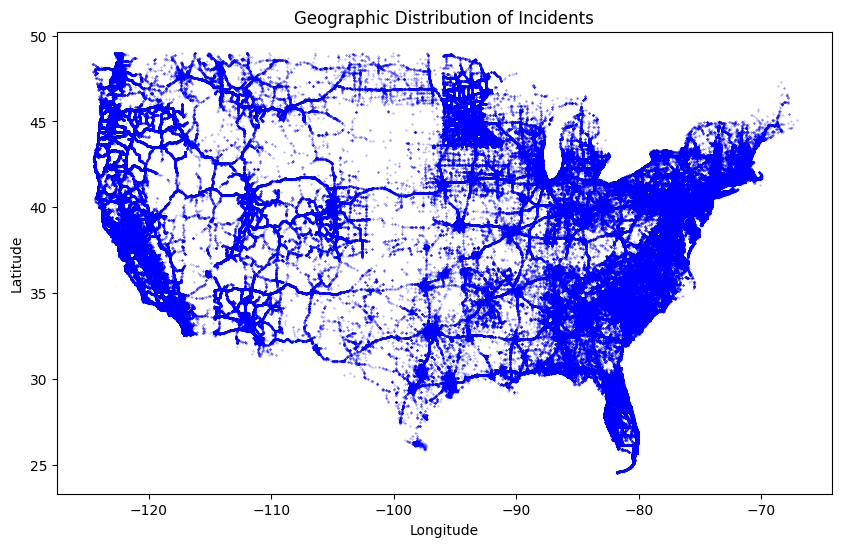

In [40]:
latitudes = df['Start_Lat']
longitudes = df['Start_Lng']

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, s=0.1, alpha=0.5, color='blue')
plt.title("Geographic Distribution of Incidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### 5. Weather and Environment Factors

- How do weather conditions (Weather_Condition, Temperature(F), Humidity(%), etc.) impact the number and severity of incidents?

In [41]:
incidents_by_weather = df.groupby('Weather_Condition')['ID'].count().sort_values(ascending=False)

# 2. Group by Weather_Condition and Severity, calculating the average severity
severity_by_weather = df.groupby('Weather_Condition')['Severity'].mean()

# 3. Correlation analysis between Weather conditions and Severity
# Assuming we have numerical columns for Temperature and Humidity
weather_temp_correlation = df[['Temperature(F)', 'Severity']].corr()
weather_humidity_correlation = df[['Humidity(%)', 'Severity']].corr()

# Print the results
print("Incidents by Weather Condition:")
print(incidents_by_weather)

print("\nAverage Severity by Weather Condition:")
print(severity_by_weather)

print("\nCorrelation between Temperature and Severity:")
print(weather_temp_correlation)

print("\nCorrelation between Humidity and Severity:")
print(weather_humidity_correlation)

Incidents by Weather Condition:
Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Heavy Freezing Rain / Windy          1
Heavy Smoke                          1
Sand / Windy                         1
Dust Whirls                          1
Partial Fog / Windy                  1
Name: ID, Length: 144, dtype: int64

Average Severity by Weather Condition:
Weather_Condition
Blowing Dust               2.084656
Blowing Dust / Windy       2.101504
Blowing Sand               2.500000
Blowing Snow               2.286486
Blowing Snow / Windy       2.070270
                             ...   
Volcanic Ash               2.090909
Widespread Dust            2.193370
Widespread Dust / Windy    2.083333
Wintry Mix                 2.154918
Wintry Mix / Windy         2.205438
Name: Severity, Length: 144, dt